In [1]:
import numpy as np
import pandas as pd
import os

# Get the data (here it's already train-test splitted)

In [2]:
df_ship_train = pd.read_csv("train.csv")
print(df_ship_train.shape)
df_ship_train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_ship_test = pd.read_csv("test.csv")
print(df_ship_test.shape)
df_ship_test.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Explore the data

In [4]:
df_ship_train['PassengerId'].nunique()

8693

In [5]:
df_ship_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_ship_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

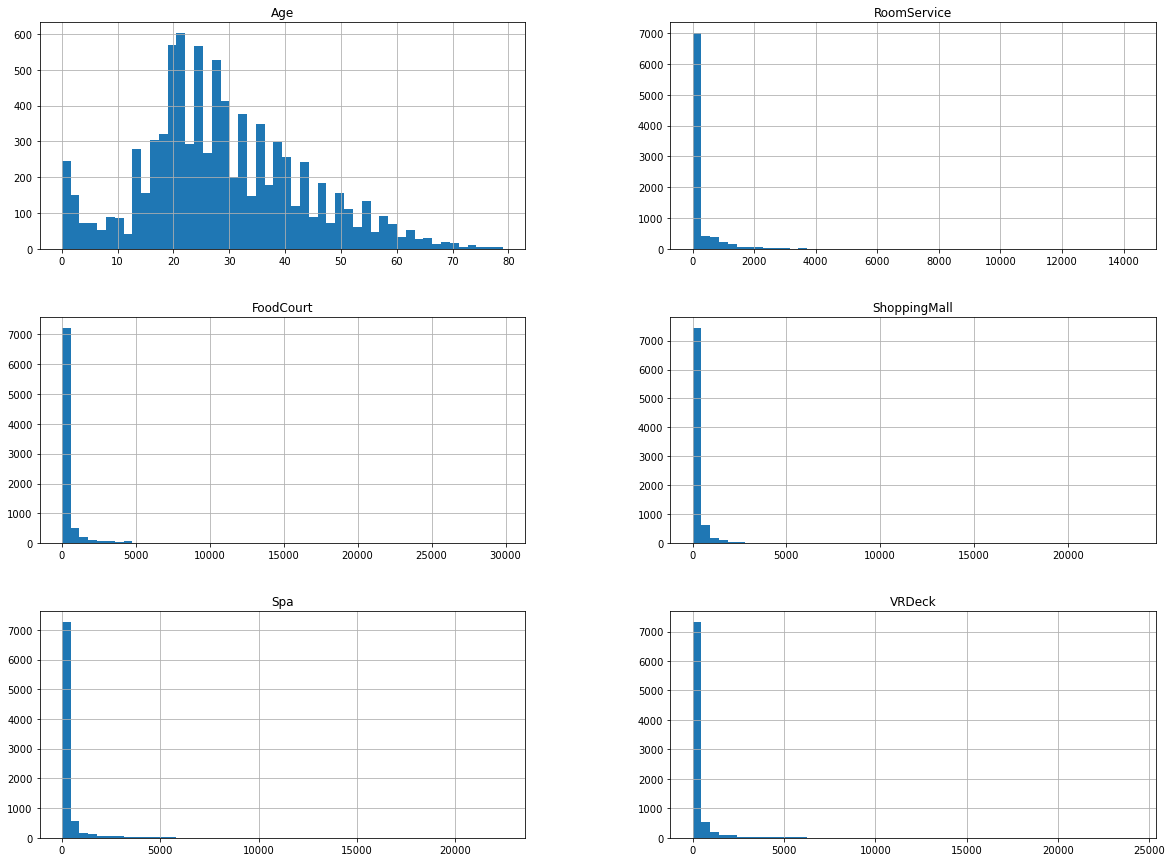

In [7]:
import matplotlib.pyplot as plt

df_ship_train.hist(bins=50, figsize=(20, 15))

In [8]:
corr_matrix = df_ship_train.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

# Try attribute combinations

In [9]:
df_ship_temp = df_ship_train.drop('Transported', axis=1)
df_ship_labels = df_ship_train['Transported'].copy()
df_ship_temp['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [10]:
df_ship_temp['PassengerGroup'] = df_ship_temp['PassengerId'].str[:4]
df_ship_temp['PassengerGroup']
df_ship_temp['PassengerGroup'].value_counts()

8988    8
4498    8
4005    8
8168    8
0984    8
       ..
1458    1
3700    1
3015    1
7970    1
0563    1
Name: PassengerGroup, Length: 6217, dtype: int64

In [11]:
df_ship_temp['PassengerNumber'] = df_ship_temp['PassengerId'].str[-2:]
df_ship_temp['PassengerNumber']
df_ship_temp['PassengerNumber'].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: PassengerNumber, dtype: int64

In [12]:
df_ship_temp['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [13]:
df_ship_temp['CabinDeck'] = df_ship_temp['Cabin'].str[0]
df_ship_temp['CabinDeck']
df_ship_temp['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [14]:
df_ship_temp['CabinSide'] = df_ship_temp['Cabin'].str[-1]
df_ship_temp['CabinSide']
df_ship_temp['CabinSide'].value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

In [15]:
df_ship_temp['CabinNum'] = df_ship_temp['Cabin'].str[2:-2]
df_ship_temp['CabinNum']
df_ship_temp['CabinNum'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1857     1
1548     1
1815     1
1884     1
1193     1
Name: CabinNum, Length: 1817, dtype: int64

# Create a Pipeline to prepare the data for the ML Algorithm

# Custom transformers

In [16]:
df_ship = df_ship_train.drop('Transported', axis=1)
df_ship_labels = df_ship_train['Transported'].copy()

In [17]:
df_ship.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

passenger_id_ix, cabin_ix = 0, 3

class NewAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform (self, X, y=None):
        X['PassengerGroup'] = X['PassengerId'].str[:4]
        X['PassengerNumber'] = X['PassengerId'].str[-2:]
        X['CabinDeck'] = X['Cabin'].str[0]
        X['CabinNum'] = X['Cabin'].str[2:-2]
        X['CabinSide'] = X['Cabin'].str[-1]
        return X

In [19]:
attr_adder = NewAttributesAdder()
df_ship_extra = attr_adder.fit_transform(df_ship)
df_ship_extra

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNumber,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,01,E,608,S


In [20]:
df_ship_final = df_ship_extra.drop(['Name', 'PassengerId', 'Cabin'], axis=1)
df_ship_final

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,PassengerNumber,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,9276,01,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,9278,01,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,9279,01,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,9280,01,E,608,S


In [21]:
df_ship_final.iloc[:,12].isna().value_counts()   # 12, 13, 14 - Cabin - ordinal with nan values

False    8494
True      199
Name: CabinDeck, dtype: int64

# Use ColumnTransformer to handle numerical and categorical data

In [22]:
df_ship = df_ship_train.drop('Transported', axis=1)
df_ship_labels = df_ship_train['Transported'].copy()

In [23]:
num_attributes = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
ordinal_attributes = ['PassengerGroup', 'PassengerNumber', 'CabinDeck', 'CabinNum']
non_ordinal_attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide']
to_drop_attributes = ['Name', 'PassengerId', 'Cabin']
all_attributes = df_ship_extra.columns

In [24]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self 

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

In [25]:
from sklearn.impute import SimpleImputer   # Replace the missing numerical values by the median (strategy='median')
from sklearn.preprocessing import OrdinalEncoder   # Encode ordinal categorical attributes
from sklearn.preprocessing import OneHotEncoder   # Encode non ordinal categorical attributes
from sklearn.preprocessing import StandardScaler   # Standardize numerical attributes

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

ord_pipeline = Pipeline([
    ('ord_fill_nan', SimpleImputer(strategy='constant', fill_value='empty')),
    ('ord_encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

num_cat_pipeline = ColumnTransformer([
    ('num_preprocess', num_pipeline, num_attributes),
    ('ord_preprocess', ord_pipeline, ordinal_attributes),
    ('n_ord_preprocess', OneHotEncoder(), non_ordinal_attributes)
])

full_pipeline = Pipeline([
    ('attribs_adder', NewAttributesAdder()),
    ('attribs_dropper', ColumnDropper(to_drop_attributes)),
    ('attribs_preprocess', num_cat_pipeline),
])

In [27]:
pd.DataFrame(num_cat_pipeline.fit_transform(df_ship_final))   # just trying num_cat_pipeline

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,0.0,5.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,3.0,0.0,5.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.333105,3.992336,-0.283579,1.189173,-0.197751,6213.0,0.0,0.0,1795.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8689,-0.752431,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,6214.0,0.0,6.0,548.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,-0.194573,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,6215.0,0.0,6.0,551.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8691,0.223820,-0.333105,0.376365,-0.283579,0.043013,2.589576,6216.0,0.0,4.0,1385.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
from sklearn import set_config
set_config(display="diagram")
full_pipeline

Pipeline(steps=[('attribs_adder', NewAttributesAdder()),
                ('attribs_dropper',
                 ColumnDropper(columns=['Name', 'PassengerId', 'Cabin'])),
                ('attribs_preprocess',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa',...
                                                 ('ord_preprocess',
                                                  Pipeline(steps=[('ord_fill_nan',
                                                                   SimpleImputer(fill_value='empty',
                                                                                 strategy='constant')),
                                                                  ('ord_encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['PassengerGroup',
                                                   'PassengerNumber',
                                                   'CabinDeck', 'CabinNum']),
                                                 ('n_ord_preprocess',
                                                  OneHotEncoder(),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP',
                                                   'CabinSide'])]))])

In [29]:
# preprocessing pipeline already trained (also for the test set)
df_ship_prepared = full_pipeline.fit_transform(df_ship)
# pd.DataFrame(pd.DataFrame(df_ship_prepared).isna().value_counts())
pd.DataFrame(df_ship_prepared)[[8, 9]].isna().value_counts()

8      9    
False  False    8693
dtype: int64

In [30]:
pd.DataFrame(df_ship_labels)

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


# Choose the best ML model

In [31]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_scores = cross_validate(log_reg, df_ship_prepared, df_ship_labels,
                            scoring=scoring, cv=10, return_train_score=True)
                             
print(log_scores.keys())
print(log_scores['test_acc'])
print(log_scores['test_acc'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.78275862 0.76666667 0.76781609 0.8009206  0.7986191  0.7986191
 0.78941312 0.79401611 0.82048331 0.76294591]
0.7882258640530139


In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_cl = DecisionTreeClassifier()

tree_scores = cross_validate(tree_cl, df_ship_prepared, df_ship_labels,
                            scoring=scoring, cv=10, return_train_score=True)
                             
print(tree_scores.keys())
print(tree_scores['test_acc'])
print(tree_scores['test_acc'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.68850575 0.68850575 0.68275862 0.58342923 0.69735328 0.73993096
 0.76869965 0.75719217 0.74913694 0.69390104]
0.7049413383066809


In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_cl = RandomForestClassifier()

forest_scores = cross_validate(forest_cl, df_ship_prepared, df_ship_labels,
                            scoring=scoring, cv=10, return_train_score=True)
                             
print(forest_scores.keys())
print(forest_scores['test_acc'])
print(forest_scores['test_acc'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.80114943 0.73563218 0.73563218 0.74223245 0.78826237 0.81703107
 0.83659379 0.79746835 0.81012658 0.74453395]
0.7808662354668466


In [35]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform

log_reg = LogisticRegression(max_iter=1000)

param_grid = {"C": np.logspace(-3,3,7),
              "penalty": ['l1', 'l2', 'elasticnet'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear']}

grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                            scoring='accuracy')

grid_search.fit(df_ship_prepared, df_ship_labels)
# here we already know the best model and the best params for it
grid_search.best_params_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selectio

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

# Evaluate the model on the test set

In [36]:
final_model = grid_search.best_estimator_

df_ship_test_prepared = full_pipeline.transform(df_ship_test)
final_predictions = final_model.predict(df_ship_test_prepared)
pd.DataFrame(final_predictions)

,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


In [37]:
df_predicitions = pd.DataFrame()
df_predicitions['PassengerId'] = list(df_ship_test['PassengerId'].values)
df_predicitions['Transported'] = list(final_predictions)
df_predicitions

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [38]:
df_predicitions.to_csv('predictions.csv', index=False, header=True, sep=',')